In [190]:
import pandas as pd
import json
import requests
from bs4 import BeautifulSoup
import csv
import regex as re
import unicodedata
import seaborn as sns
import matplotlib.pyplot as plt
import networkx as nx 
from collections import Counter
import seaborn as sns
import numpy as np
import matplotlib.cm as cm
# from fa2 import ForceAtlas2
from Functions import DataCollection, DataCleaning, GetConnectedMoviesArtist
from imdb import IMDb

# Warning to ignore
import warnings
from matplotlib import MatplotlibDeprecationWarning
warnings.filterwarnings('ignore', category=FutureWarning)
warnings.filterwarnings('ignore', category=MatplotlibDeprecationWarning)


In [191]:
ia = IMDb()
items = ia.search_movie('365 Days')
for i in items:
    print(i)
print(items[0])


365 Days
The Next 365 Days
365 Days: This Day
365 Days
Assassination Classroom: 365 Days
365 Days
365 Days
365 Days of Love
365 Days of Happiness
365 Days
365 Days, also Known as a Year
365 Days
365 Days: A Year in Happy Valley
Kekkon Surutte, Honto desu ka?: 365 Days to the Wedding
365 Days of Love Letters
365 Days in LA
365 Days
Deadly Attraction
365 Days of Loving You
Shanti Days: 365-nichi, Shiawase no Kokyû
365 Days


In [167]:
ia = IMDb()
movies = ia.search_movie('365 Days')
movie = movies[0]
ia.update(movie)
print(movie.infoset2keys)
for key in movie.infoset2keys:
    if key in movie:
        print(f"{key}: {movie[key]}")
    else:
        print(f"{key}: Information not available")


{'main': ['original title', 'localized title', 'cast', 'genres', 'runtimes', 'countries', 'country codes', 'language codes', 'color info', 'aspect ratio', 'sound mix', 'box office', 'certificates', 'original air date', 'rating', 'votes', 'cover url', 'imdbID', 'plot outline', 'languages', 'title', 'year', 'kind', 'director', 'writer', 'producer', 'composer', 'cinematographer', 'editor', 'editorial department', 'casting director', 'production design', 'set decoration', 'costume designer', 'make up', 'production manager', 'assistant director', 'art department', 'sound crew', 'special effects', 'visual effects', 'stunt performer', 'camera and electrical department', 'casting department', 'costume department', 'location management', 'music department', 'script department', 'transportation department', 'miscellaneous crew', 'akas', 'bottom 100 rank', 'production companies', 'distributors', 'other companies'], 'plot': ['plot', 'synopsis']}
main: Information not available
plot: ['Massimo is a

In [192]:
ia = IMDb()
movie = ia.search_movie('My Wife is a Gangster')[0]
ia.update(movie)

# print the director(s)
for director in movie['directors']:
    print(director['name'])

Jin-gyu Cho


In [197]:
movie.data.get('box office', None)

# **Data**
---

In [2]:
df_movies = pd.read_json('df_movies.json', orient='table')
df_movies.shape

(5780, 7)

In [3]:
df_movies

,Title,Director,Cast,Country,Genre,Year,Hyperref
0,365 Days,barbara biaowas tomasz mandes,"anna-maria sieklucka,michele morrone, bronisaw...",europe,Thriller,2020,365_Days_(2020_film)
1,7500,patrick vollrath,"joseph gordon-levitt,aylin tezel",mix,Action,2020,7500_(film)
2,Archenemy,adam egypt mortimer,"joe manganiello,skylan brooks, zolee griggs,pa...",mix,Action,2020,Archenemy_(film)
3,Asuraguru,araajdheep,"vikram prabhu,mahima nambiar,subbaraju,yogi babu",india,Action,2020,Asuraguru
4,Aswathama,ramana teja,"naga shourya,mehreen pirzada",india,Action,2020,Aswathama_(film)
...,...,...,...,...,...,...,...
6196,The League of Extraordinary Gentlemen,stephen norrington,"sean connery,shane west,stuart townsend",united states,Mix,2003,The_League_of_Extraordinary_Gentlemen_(film)
6197,The Promise,chen kaige,"hiroyuki sanada,jang dong-gun,cecilia cheung",china,Mix,2005,The_Promise_(2005_film)
6198,Legend of the Guardians: The Owls of Ga'Hoole,zack snyder,"jim sturgess,joel edgerton,geoffrey rush,hugo ...",mix,Fantasy,2010,Legend_of_the_Guardians:_The_Owls_of_Ga%27Hoole
6199,Lethal,dustin rikert,"heather marie marsden,lorenzo lamas,frank zaga...",united states,Action,2004,Lethal_(film)


# **Connected movies**
---

In [5]:
with open('connected_movies_and_casts.json', 'r') as file:
    connected_movies = json.load(file)

connected_movies

{'365 Days': {'365 Days: This Day': ['michele morrone',
   'anna-maria sieklucka',
   'magdalena lamparska']},
 '7500': {'Looper': ['joseph gordon-levitt'],
  'Premium Rush': ['joseph gordon-levitt'],
  'Sin City: A Dame to Kill For': ['joseph gordon-levitt'],
  'Hesher': ['joseph gordon-levitt'],
  '50/50': ['joseph gordon-levitt'],
  'Don Jon': ['joseph gordon-levitt'],
  'The Walk': ['joseph gordon-levitt'],
  'GI Joe: The Rise of Cobra': ['joseph gordon-levitt'],
  'Inception': ['joseph gordon-levitt'],
  'Project Power': ['joseph gordon-levitt'],
  'Treasure Planet': ['joseph gordon-levitt']},
 'Archenemy': {'No Sudden Move': ['amy seimetz'],
  'Sabotage': ['joe manganiello'],
  'The Sleepover': ['joe manganiello'],
  'The Spine of Night': ['joe manganiello'],
  'Pet Sematary': ['amy seimetz'],
  'Rampage': ['joe manganiello'],
  'Upstream Color': ['amy seimetz']},
 'Asuraguru': {'Cocktail ra vijaya murugan': ['yogi babu']},
 'Aswathama': {},
 'Attack': {'Satyameva Jayate 2': ['jo

# **Directors**
---

In [8]:
# Number of unique directors
unique_directors = df_movies['Director'].nunique()
print("Number of unique directors:", unique_directors)

Number of unique directors: 3647


In [25]:
# Frequency of each director
director_counts = df_movies['Director'].value_counts()
director_counts

Director
david de coteau     17
                    14
takashi miike       14
takashi shimizu     12
shawn levy          12
                    ..
sid bennett          1
peter dalle          1
faruk aksoy          1
yannis smaragdis     1
dustin rikert        1
Name: count, Length: 3647, dtype: int64

In [33]:
with open('director_counts.txt', 'w') as f:
    f.write(str(director_counts))

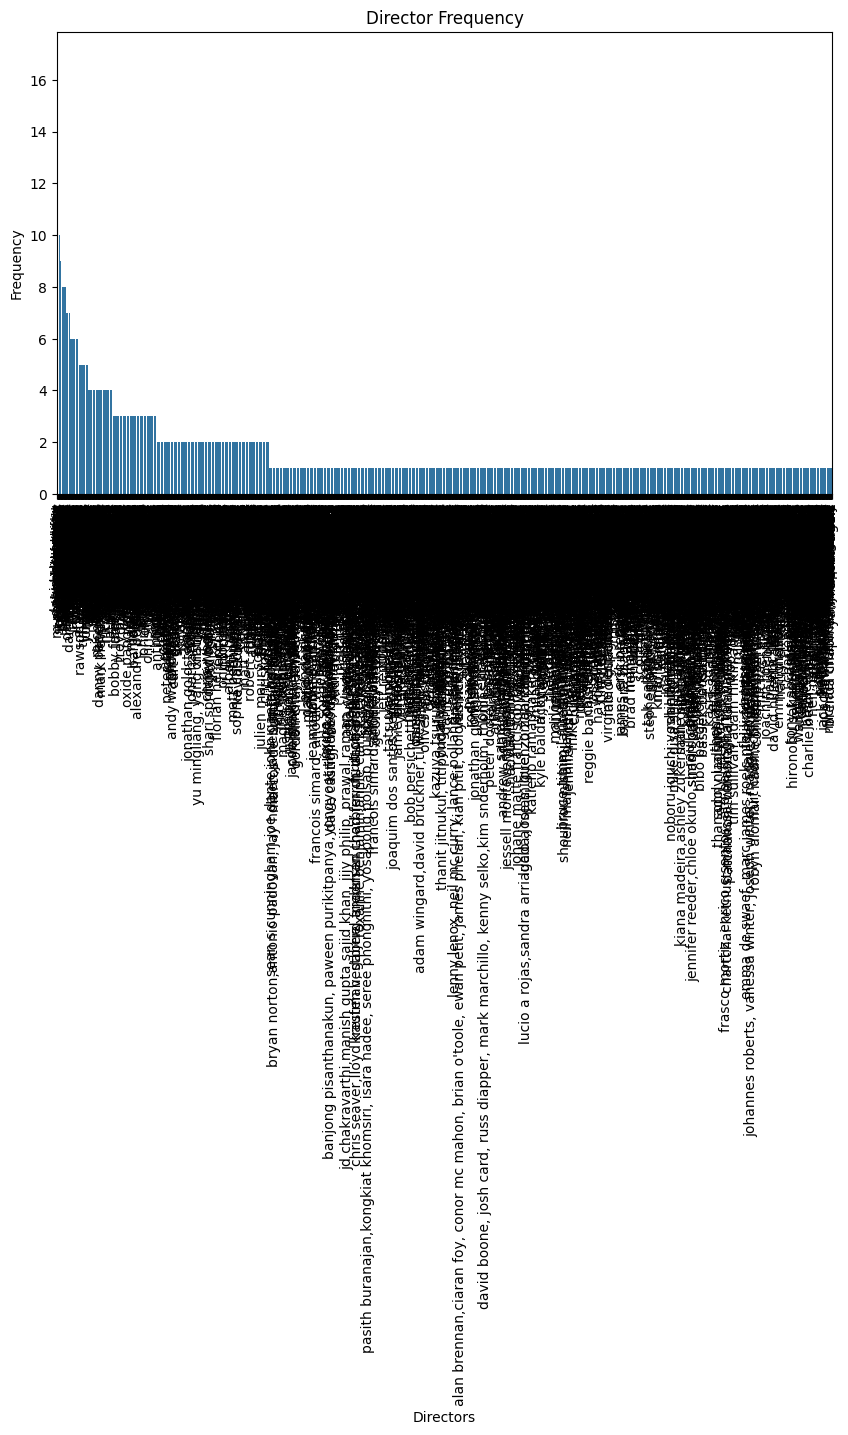

In [27]:
# sns.barplot(x = 'Director', y = director_counts.values, data = df_movies, errorbar=None)

# Create a bar plot
plt.figure(figsize=(10,6))
sns.barplot(x=director_counts.index, y=director_counts.values)
plt.title('Director Frequency')
plt.xlabel('Directors')
plt.ylabel('Frequency')
plt.xticks(rotation=90)
plt.show()


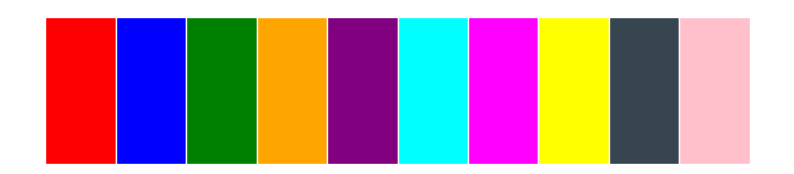

In [37]:
# Your color palette
colors = ["#FF0000", "#0000FF", "#008000", "#FFA500", 
          "#800080", "#00FFFF", "#FF00FF", "#FFFF00", 
          "#36454F", "#FFC0CB"]

# Setting up a simple range for bars
n = len(colors)
x = np.arange(n)

# Create a bar plot
plt.figure(figsize=(10, 2))  # Wide and short figure
plt.bar(x, height=[1]*n, color=colors, width=1.0)  # Bar width covers the whole space

# Remove all the axis labels and ticks
plt.xticks([])
plt.yticks([])
plt.box(False)

# Show the plot
plt.show()

In [153]:
def plot_bar(data_counts, column_string, cmap_string, title, x_data, y_data, x_label, y_label, ):
    # Colors
    num_unique = data_counts[column_string].nunique()
    cmap = cm.get_cmap(cmap_string)  # https://matplotlib.org/stable/users/explain/colors/colormaps.html
    colors = [cmap(i) for i in np.linspace(0, 1, num_unique)]
    
    # Bar plot
    sns.set(style="whitegrid") 
    plt.figure(figsize=(20, 7)) 
    barplot = sns.barplot(x=x_data, y=y_data, data=data_counts, palette=colors)
    if 
    plt.xticks(rotation=45, ha='right', fontsize=14)
    plt.title(title, fontsize=25, fontweight="bold")
    plt.xlabel(x_label, fontsize=16)
    plt.ylabel(y_label, fontsize=16)

    # Add count numbers on each bar
    for p in barplot.patches:
        barplot.annotate(format(p.get_height(), '.0f'), 
                        (p.get_x() + p.get_width() / 2., p.get_height()), 
                        ha = 'center', va = 'center', 
                        xytext = (0, 9), 
                        textcoords = 'offset points',
                        fontsize=14)
    plt.show()

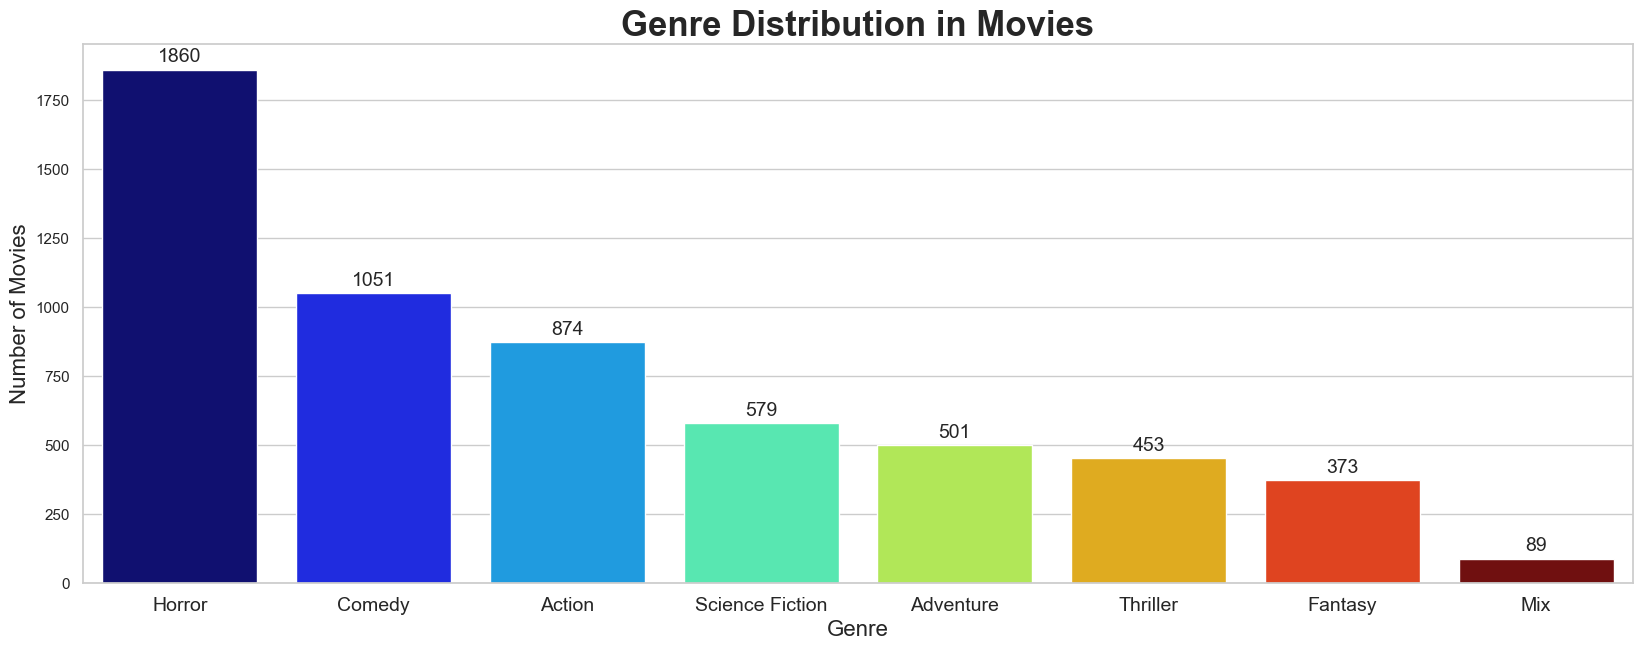

In [154]:
genre_counts = df_movies['Genre'].value_counts()
genre_counts = genre_counts.reset_index()
genre_counts.columns = ['Genre', 'Count']

plot_bar(data_counts = genre_counts,
         column_string = "Genre",
         cmap_string = "jet",
         title = "Genre Distribution in Movies",
         x_data = "Genre",
         y_data = "Count",
         x_label = "Genre",
         y_label = "Number of Movies")

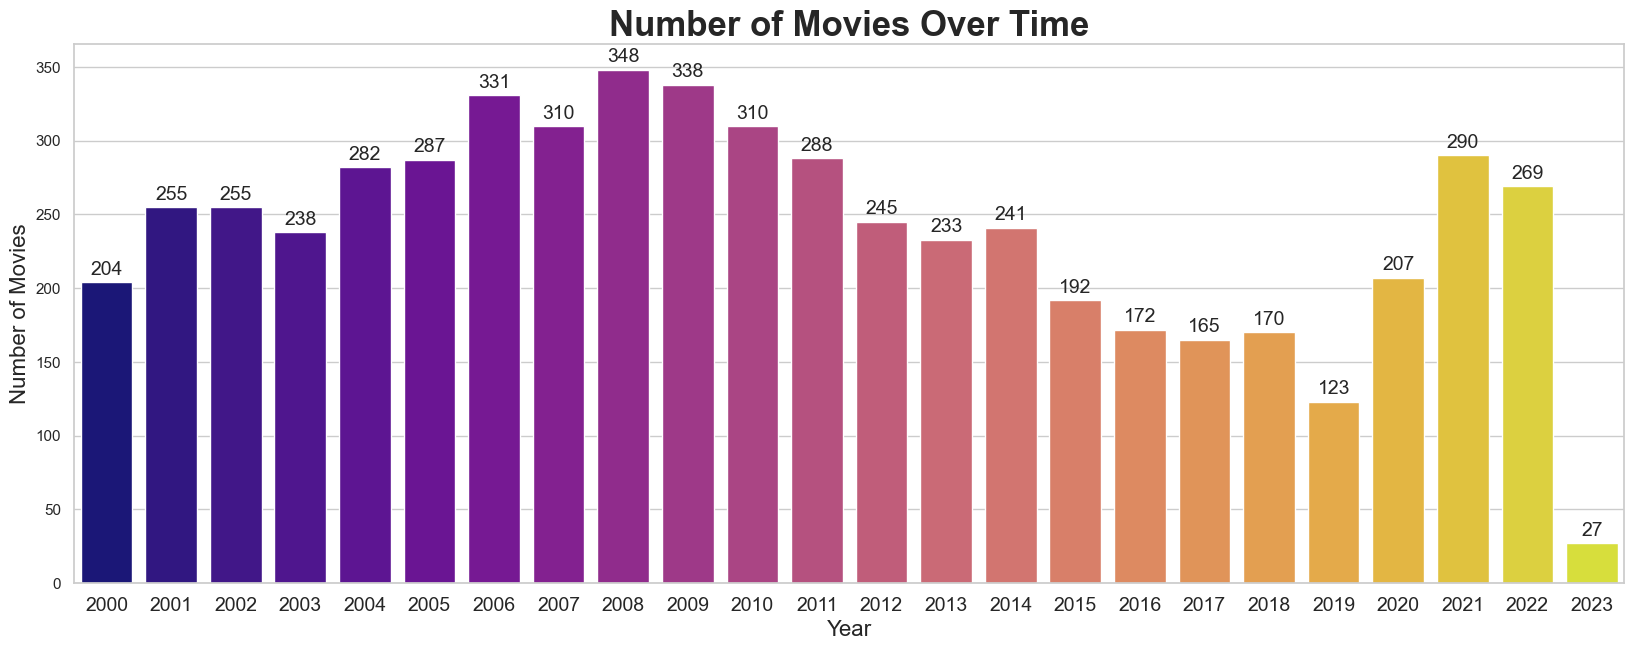

In [155]:
df_movies['Year'] = pd.to_numeric(df_movies['Year'], errors='coerce')
movies_per_year = df_movies.groupby('Year').size()
movies_per_year = movies_per_year.reset_index()
movies_per_year.columns = ['Year', 'Number of Movies']

plot_bar(data_counts = movies_per_year,
         column_string = "Year",
         cmap_string = "plasma",
         title = "Number of Movies Over Time",
         x_data = "Year",
         y_data = "Number of Movies",
         x_label = "Year",
         y_label = "Number of Movies")

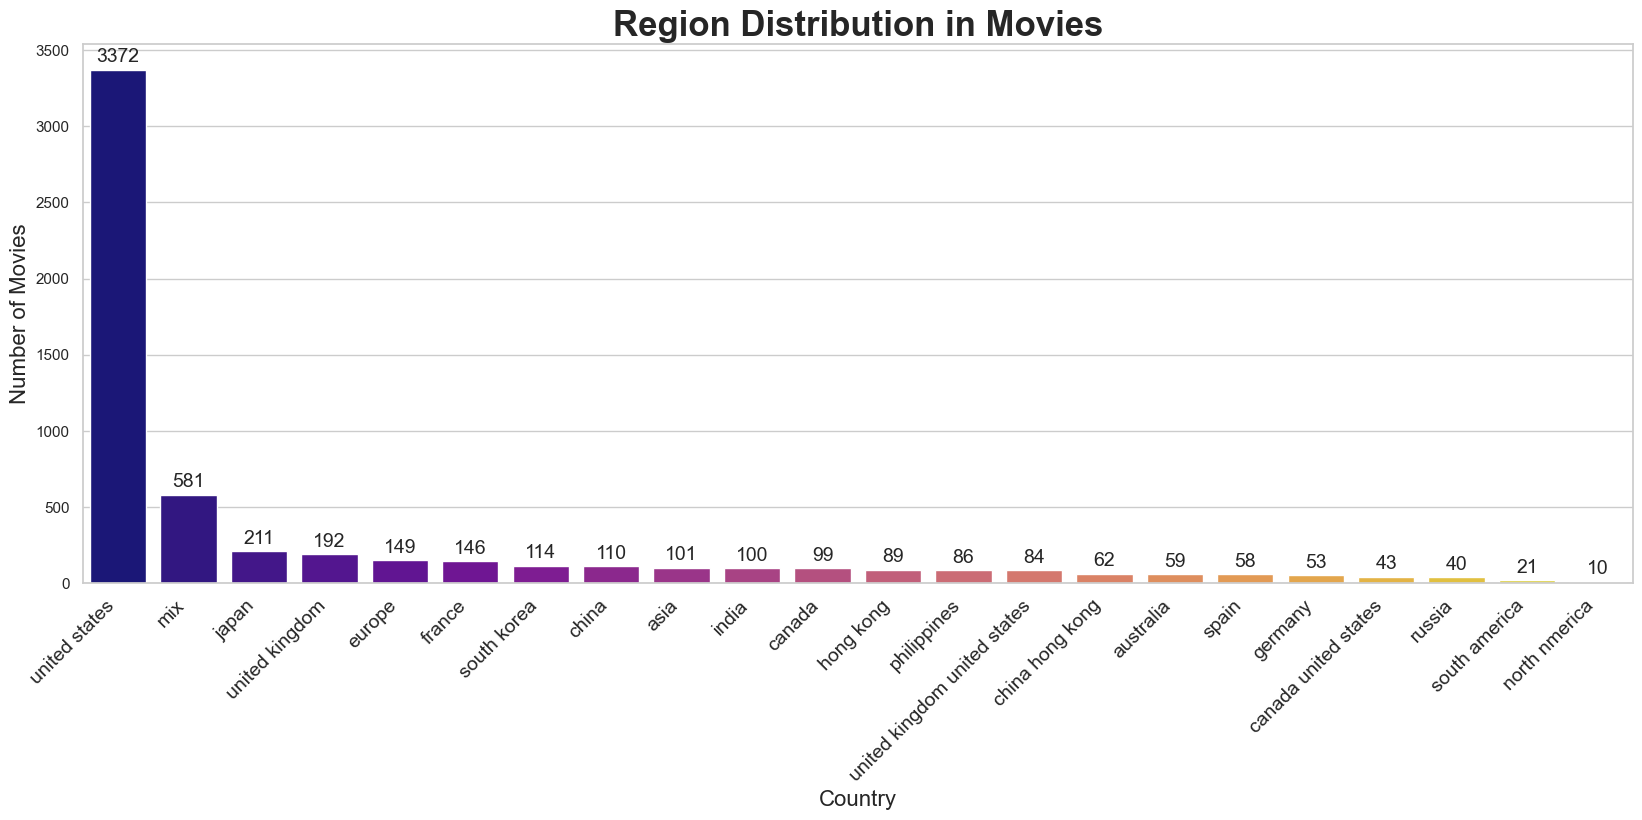

In [149]:
genre_counts = df_movies['Country'].value_counts()
genre_counts = genre_counts.reset_index()
genre_counts.columns = ['Country', 'Count']

plot_bar(data_counts = genre_counts,
         column_string = "Country",
         cmap_string = "plasma",
         title = "Region Distribution in Movies",
         x_data = "Country",
         y_data = "Count",
         x_label = "Country",
         y_label = "Number of Movies")